In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

## Initial EDA 

I ran the automated eda using Pandas Profiling. Used this report to look at distributions and get insight into missing data - there is no missing data. 

In [4]:
tax_df = pd.read_csv('TaxInfo.csv')

In [5]:
tax_df.head()

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed_2017,Filed_2016,Filed_2015,PoliticalParty
0,49685,227187,0,0,105,0,1,1,1,Democrat
1,64756,-507342,2,3,68,3,1,0,0,Independent
2,115435,521290,1,3,81,2,0,1,0,Republican
3,99454,251829,2,1,52,4,1,0,0,Republican
4,157274,-472337,0,1,28,1,1,0,1,Independent


In [6]:
tax_df.shape


(1004, 10)

In [7]:
tax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   HHI             1004 non-null   int64 
 1   HHDL            1004 non-null   int64 
 2   Married         1004 non-null   int64 
 3   CollegGrads     1004 non-null   int64 
 4   AHHAge          1004 non-null   int64 
 5   Cars            1004 non-null   int64 
 6   Filed_2017      1004 non-null   int64 
 7   Filed_2016      1004 non-null   int64 
 8   Filed_2015      1004 non-null   int64 
 9   PoliticalParty  1004 non-null   object
dtypes: int64(9), object(1)
memory usage: 78.6+ KB


### Reassigning Variable Types
Based on the information above, we will need to make a few adjustments to variable data type. Each variable indicating whether the individual filed taxes in a given year will be switched to categorical. We will also switch 'Married' to a categorical variable as well.

In [8]:
tax_df['Married'] = tax_df['Married'].astype('category')
tax_df['Filed_2017'] = tax_df['Filed_2017'].astype('category')
tax_df['Filed_2016'] = tax_df['Filed_2016'].astype('category')
tax_df['Filed_2015'] = tax_df['Filed_2015'].astype('category')

In [10]:
tax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   HHI             1004 non-null   int64   
 1   HHDL            1004 non-null   int64   
 2   Married         1004 non-null   category
 3   CollegGrads     1004 non-null   int64   
 4   AHHAge          1004 non-null   int64   
 5   Cars            1004 non-null   int64   
 6   Filed_2017      1004 non-null   category
 7   Filed_2016      1004 non-null   category
 8   Filed_2015      1004 non-null   category
 9   PoliticalParty  1004 non-null   object  
dtypes: category(4), int64(5), object(1)
memory usage: 51.6+ KB


In [12]:
tax_df.groupby("PoliticalParty").mean()

,HHI,HHDL,CollegGrads,AHHAge,Cars
PoliticalParty,,,,,
Democrat,145224.312500,102.267857,2.630952,59.994048,2.372024
Independent,154559.643917,-13968.228487,2.569733,61.047478,2.415430
Republican,160896.229607,-6104.238671,2.586103,60.691843,2.555891


In [13]:
tax_df.groupby("PoliticalParty").median()

,HHI,HHDL,CollegGrads,AHHAge,Cars
PoliticalParty,,,,,
Democrat,142418.0,7733.5,3.0,58.5,2.0
Independent,153930.0,-31309.0,3.0,62.0,2.0
Republican,161275.0,-20152.0,3.0,61.0,3.0


In [11]:
tax_narrow = tax_df.loc[:, ['PoliticalParty', 'Married', 'HHI']]

In [14]:
tax_narrow.pivot_table(index='PoliticalParty', columns='Married', aggfunc='count')

HHI          
Married           0    1    2
PoliticalParty               
Democrat        121  111  104
Independent     119  111  107
Republican      102  128  101

### Visualizations

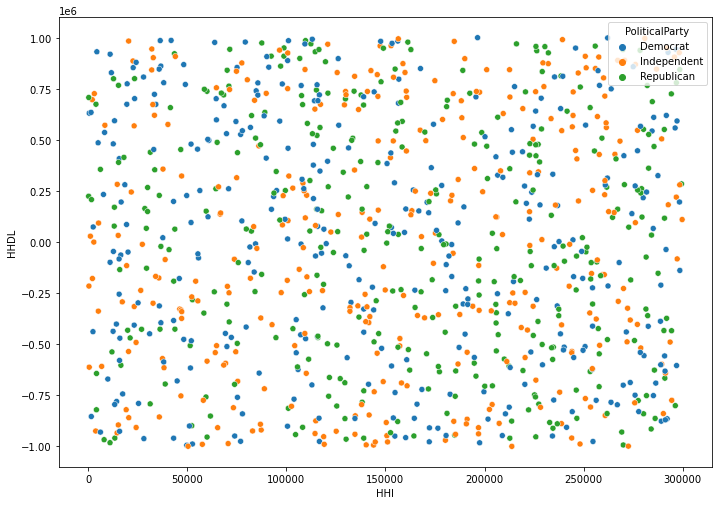

In [15]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.scatterplot(data=tax_df, x="HHI", y="HHDL", hue = 'PoliticalParty');

Gross! Based on the graph above it doesn't look like there is clear clusering of political groups based on household income and household debt level. Lets see if we can find differentiation by adding more categorical variables. 

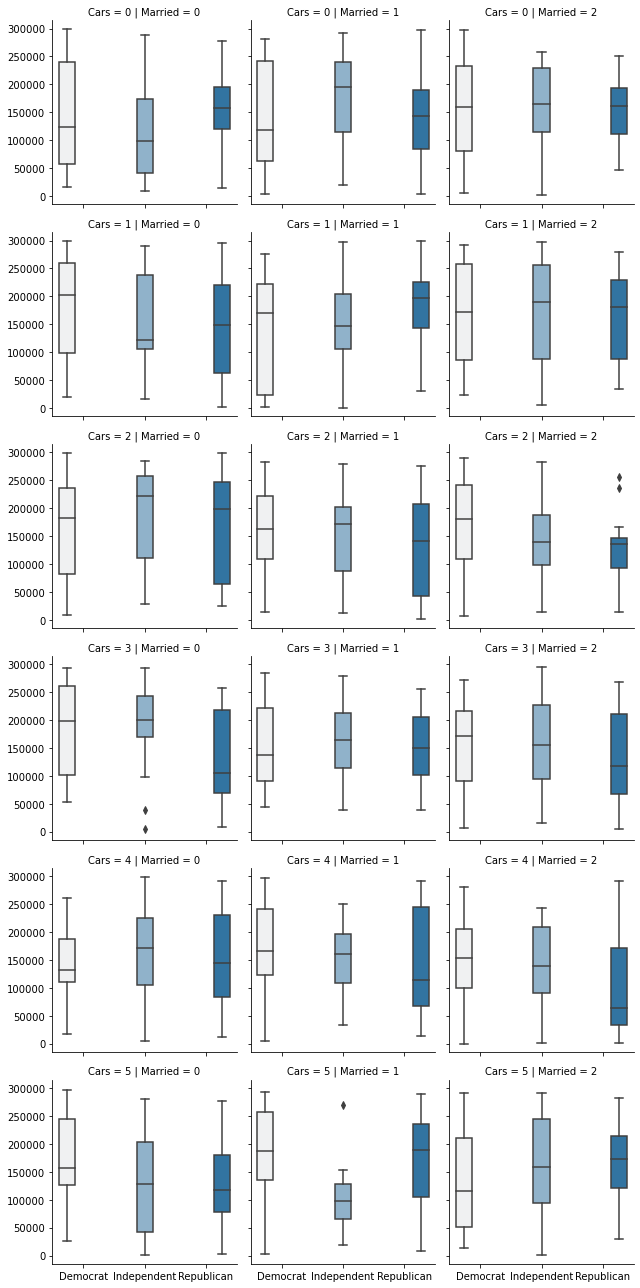

In [16]:
#Household Income by Political Party Facet by Married & Cars
g = sns.FacetGrid(tax_df, col="Married",  row="Cars")
g.map_dataframe(sns.boxplot, x = "PoliticalParty", y = "HHI", hue = 'PoliticalParty');

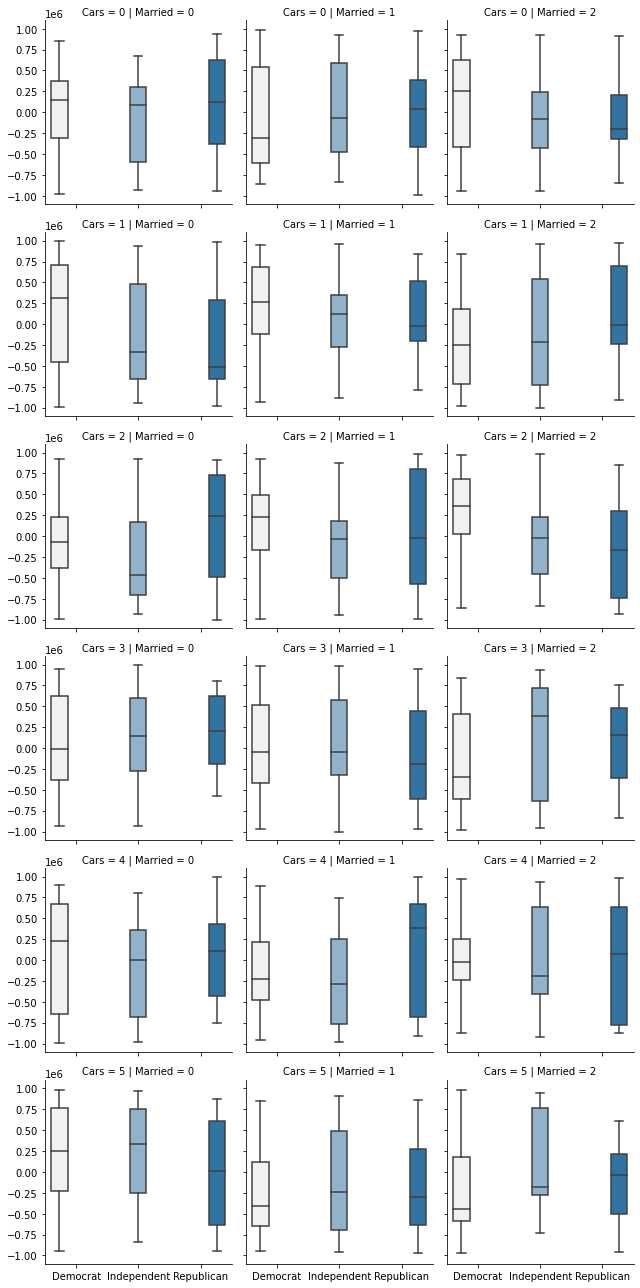

In [17]:
#Household Debt Level by Political Party Facet by Married & Cars
g = sns.FacetGrid(tax_df, col="Married",  row="Cars")
g.map_dataframe(sns.boxplot, x = "PoliticalParty", y = "HHDL", hue = 'PoliticalParty');

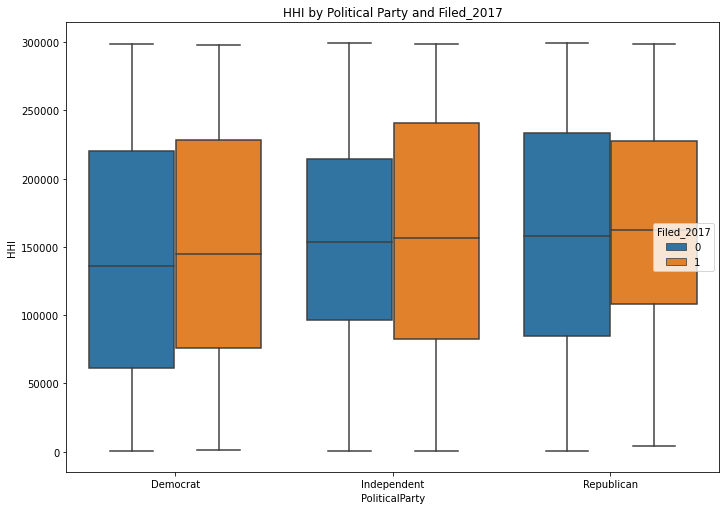

In [18]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
ax = sns.boxplot(x="PoliticalParty", y="HHI", data=tax_df, hue = 'Filed_2017')
plt.title('HHI by Political Party and Filed_2017');


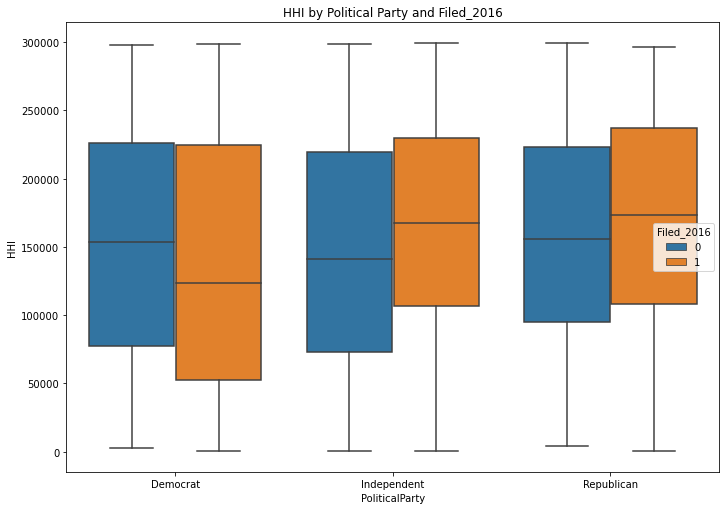

In [19]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
ax2 = sns.boxplot(x="PoliticalParty", y="HHI", data=tax_df, hue = 'Filed_2016')
plt.title('HHI by Political Party and Filed_2016');

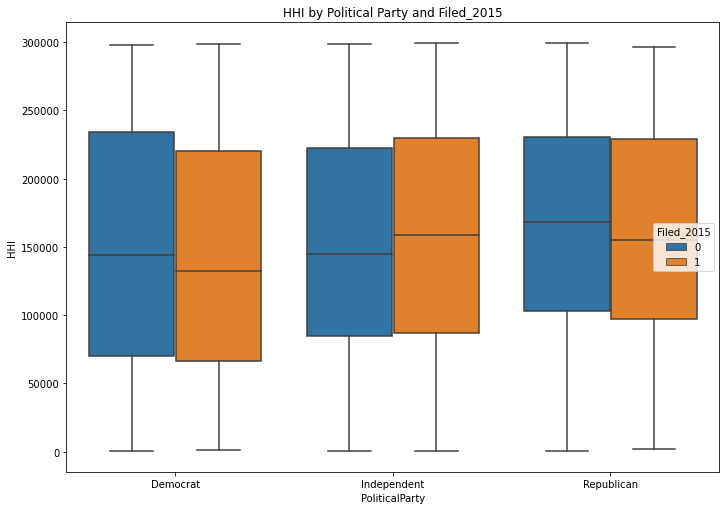

In [20]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
ax3 = sns.boxplot(x="PoliticalParty", y="HHI", data=tax_df, hue = 'Filed_2015')
plt.title('HHI by Political Party and Filed_2015');

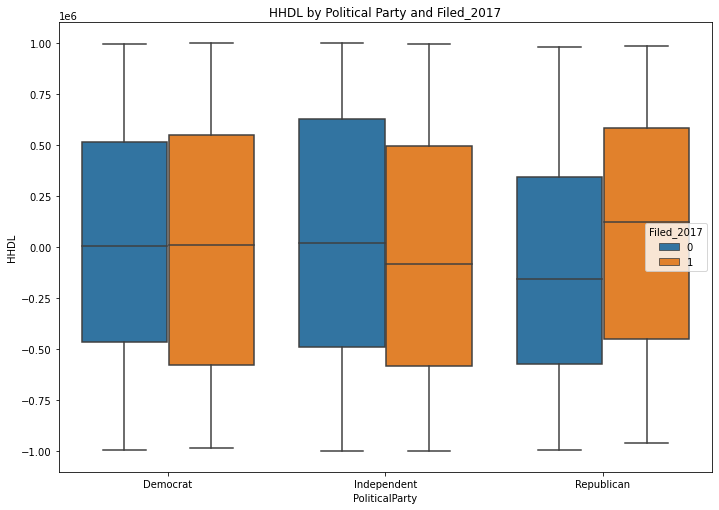

In [21]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
ax = sns.boxplot(x="PoliticalParty", y="HHDL", data=tax_df, hue = 'Filed_2017')
plt.title('HHDL by Political Party and Filed_2017');

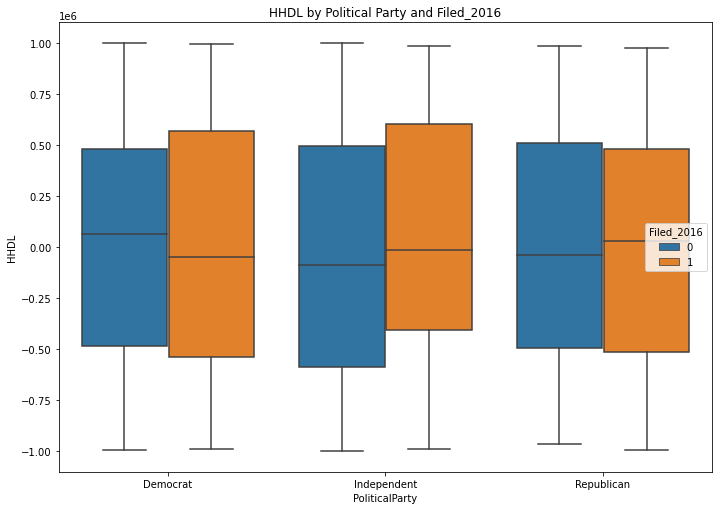

In [22]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
ax = sns.boxplot(x="PoliticalParty", y="HHDL", data=tax_df, hue = 'Filed_2016')
plt.title('HHDL by Political Party and Filed_2016');

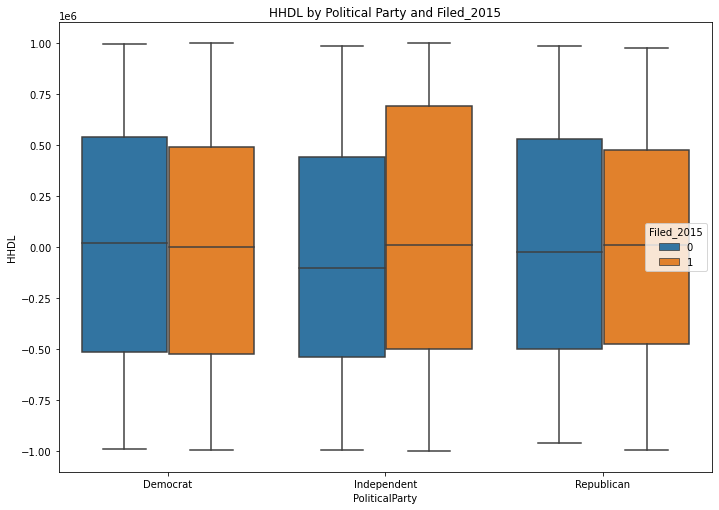

In [23]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
ax = sns.boxplot(x="PoliticalParty", y="HHDL", data=tax_df, hue = 'Filed_2015')
plt.title('HHDL by Political Party and Filed_2015');

Based on visualizations above, I do not see alot of opportunity to differentiate between political parties but maybe our models will parse out deeper relationships.

## Model Building

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split


In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

### Logistic Regression Model

In [26]:
outcome = 'PoliticalParty'
predictors = [c for c in tax_df.columns if c != outcome]

X = tax_df[predictors]
Y = tax_df[outcome]
train_X, valid_X, train_Y, valid_Y = train_test_split(X, Y, test_size=0.2, random_state=21)

#Cat/Num Columns for tax_df
categorical_cols = train_X.select_dtypes(include=['category']).columns.tolist()
numeric_cols = train_X.select_dtypes(include=['number']).columns.tolist()

all_cols = train_X.columns.tolist()

# Create transformer objects
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Classifier model
clf_model = LogisticRegression(penalty='l2', C=1, solver='saga', max_iter=500)

# Pipeline Creation
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model)])

clf.fit(train_X, train_Y)

print(f"Training score: {clf.score(train_X, train_Y):.3f}")
print(f"Test score: {clf.score(valid_X, valid_Y):.3f}")

Training score: 0.390
Test score: 0.313


Confusion matrix for train, without normalization
[[110  82  75]
 [ 80 109  77]
 [ 89  87  94]]
Normalized confusion matrix for train
[[0.41198502 0.3071161  0.28089888]
 [0.30075188 0.40977444 0.28947368]
 [0.32962963 0.32222222 0.34814815]]


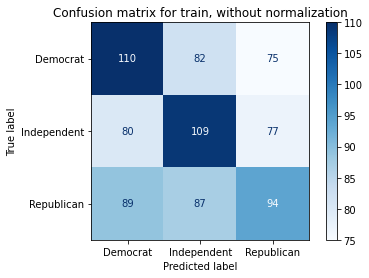

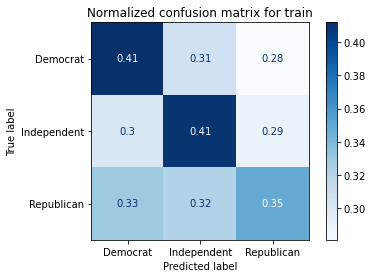

In [27]:
titles_options = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names = clf['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, train_X, train_Y,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show();

Confusion matrix for test, without normalization
[[17 32 20]
 [26 25 20]
 [19 21 21]]
Normalized confusion matrix for test
[[0.24637681 0.46376812 0.28985507]
 [0.36619718 0.35211268 0.28169014]
 [0.31147541 0.3442623  0.3442623 ]]


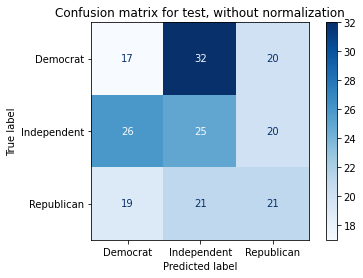

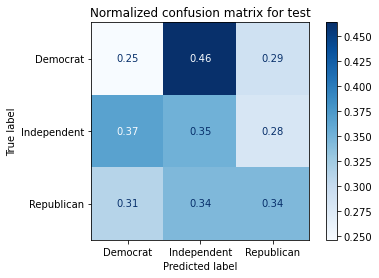

In [28]:
titles_options1 = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

class_names1 = clf['classifier'].classes_

for title, normalize in titles_options1:
    disp = plot_confusion_matrix(clf, valid_X, valid_Y,
                                 display_labels=class_names1,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show();

In [29]:
clf.n_features_in_

9

#### Logistic Regression Model w/Feature Selection

In [34]:
outcome = 'PoliticalParty'
predictors = [c for c in tax_df.columns if c != outcome]

X = tax_df[predictors]
Y = tax_df[outcome]
train_X, valid_X, train_Y, valid_Y = train_test_split(X, Y, test_size=0.2, random_state=21)

#Cat/Num Columns for tax_df
categorical_cols = train_X.select_dtypes(include=['category']).columns.tolist()
numeric_cols = train_X.select_dtypes(include=['number']).columns.tolist()

all_cols = train_X.columns.tolist()

# Create transformer objects
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Classifier model
clf_model = LogisticRegression(penalty='l2', C=1, solver='saga', max_iter=500)

# Pipeline Creation
clf1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('feature_selection', SelectFromModel(LinearSVC())),
                      ('classifier', clf_model)])
# Fit Model
clf1.fit(train_X, train_Y)

# Show Results
print(f"Training score: {clf1.score(train_X, train_Y):.3f}")
print(f"Test score: {clf1.score(valid_X, valid_Y):.3f}")

Training score: 0.379
Test score: 0.343


Question!!! Why does this model score better than the one above when they have the same amount of features??

In [31]:
clf1.n_features_in_

9

Confusion matrix for train, without normalization
[[115 101  51]
 [ 87 127  52]
 [103 105  62]]
Normalized confusion matrix for train
[[0.43071161 0.37827715 0.19101124]
 [0.32706767 0.47744361 0.19548872]
 [0.38148148 0.38888889 0.22962963]]


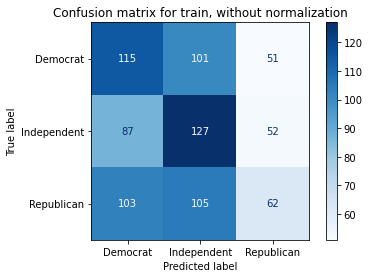

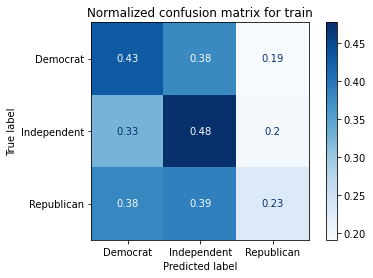

In [32]:
titles_options = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names = clf1['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf1, train_X, train_Y,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show();

Confusion matrix for test, without normalization
[[22 35 12]
 [29 28 14]
 [19 23 19]]
Normalized confusion matrix for test
[[0.31884058 0.50724638 0.17391304]
 [0.4084507  0.3943662  0.1971831 ]
 [0.31147541 0.37704918 0.31147541]]


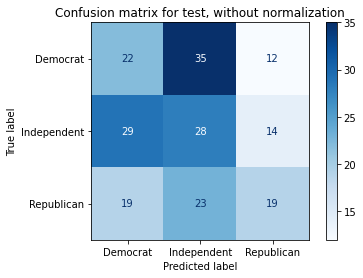

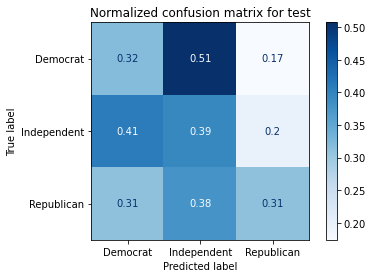

In [33]:
titles_options1 = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

class_names1 = clf1['classifier'].classes_

for title, normalize in titles_options1:
    disp = plot_confusion_matrix(clf1, valid_X, valid_Y,
                                 display_labels=class_names1,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show();

#### Logistic Regression Summary
Using feature selection improves logistic regression model, however, we do not have a reliable model in terms of predicting power. 

### Random Forest Model

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
from dmba import gainsChart, liftChart
from dmba.metric import AIC_score

no display found. Using non-interactive Agg backend


In [37]:
from dmba import classificationSummary

In [38]:
outcome = 'PoliticalParty'
predictors = [c for c in tax_df.columns if c != outcome]

X = tax_df[predictors]
Y = tax_df[outcome]
train_X, valid_X, train_Y, valid_Y = train_test_split(X, Y, test_size=0.2, random_state=21)

#Cat/Num Columns for tax_df
categorical_cols = train_X.select_dtypes(include=['category']).columns.tolist()
numeric_cols = train_X.select_dtypes(include=['number']).columns.tolist()

all_cols = train_X.columns.tolist()

# Create transformer objects
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Classifier model
clf_model = RandomForestClassifier(oob_score=True, random_state=21)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf_rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model)])

clf_rf.fit(train_X, train_Y)

print(f"Training score: {clf_rf.score(train_X, train_Y):.3f}")
print(f"Test score: {clf_rf.score(valid_X, valid_Y):.3f}")

Training score: 1.000
Test score: 0.333


In [39]:
#Training Confusion Matrix
classificationSummary(train_Y, clf_rf.predict(train_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1   2
     0 267   0   0
     1   0 266   0
     2   0   0 270


In [40]:
#Validation Confusion Matrix
classificationSummary(valid_Y, clf_rf.predict(valid_X))

Confusion Matrix (Accuracy 0.3333)

       Prediction
Actual  0  1  2
     0 20 31 18
     1 27 28 16
     2 25 17 19


#### Random Forest Summary
Here we can see that our Random Forest Models are overfitting the training data with a perfect prediction score. However, as soon as model is released onto unseen data, it falls apart with results similar to a logistic regression model. 

### Neural Network Classifier
Lets try a NN model🤷‍♂️.

In [41]:
from sklearn.neural_network import MLPClassifier

In [42]:
#Designate outcome variable
outcome = 'PoliticalParty'
predictors = [c for c in tax_df.columns if c != outcome]

X = tax_df[predictors]
Y = tax_df[outcome]
train_X, valid_X, train_Y, valid_Y = train_test_split(X, Y, test_size=0.2, random_state=21)

#Cat/Num Columns for tax_df
categorical_cols = train_X.select_dtypes(include=['category']).columns.tolist()
numeric_cols = train_X.select_dtypes(include=['number']).columns.tolist()

all_cols = train_X.columns.tolist()

# Create transformer objects
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Classifier model
clf_model = MLPClassifier(activation = 'logistic', solver = 'lbfgs', max_iter = 10000, random_state = 21)

# Pipeline
clf_nn = Pipeline(steps=[('preprocessor', preprocessor),
                      ('feature_selection', SelectFromModel(LinearSVC())),
                      ('classifier', clf_model)])

#Fit Model
clf_nn.fit(train_X, train_Y)

#Show Results
print(f"Training score: {clf_nn.score(train_X, train_Y):.3f}")
print(f"Test score: {clf_nn.score(valid_X, valid_Y):.3f}")

Training score: 0.379
Test score: 0.343


In [43]:
#Training Confusion Matrix
classificationSummary(train_Y, clf_nn.predict(train_X))

Confusion Matrix (Accuracy 0.3786)

       Prediction
Actual   0   1   2
     0 115 101  51
     1  87 127  52
     2 103 105  62


In [44]:
#Validation Confusion Matrix
classificationSummary(valid_Y, clf_nn.predict(valid_X))

Confusion Matrix (Accuracy 0.3433)

       Prediction
Actual  0  1  2
     0 22 35 12
     1 29 28 14
     2 19 23 19


#### NN Summary
Even with the Neural Network Model we are seeing similar results to Random Forest. When we reach the validation data, our model still doesn't serve as a reliable predictor. 

### Multiple Models with Cross Validation

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

In [46]:
clf1 = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
    random_state=0)
scores1 = cross_val_score(clf1, X, Y, cv=5)



clf2 = RandomForestClassifier(n_estimators=100, max_depth=None,
    min_samples_split=2, random_state=0)
scores2 = cross_val_score(clf2, X, Y, cv=5)



clf3 = ExtraTreesClassifier(n_estimators=100, max_depth=None,
    min_samples_split=2, random_state=0)
scores3 = cross_val_score(clf3, X, Y, cv=5)

print('Decision Tree Classifier')
print(scores1)
print(f"Mean score: {scores1.mean():.3f}")
print( )
print('Random Forest Classifier')
print(scores2)
print(f"Mean score: {scores2.mean():.3f}")
print( )
print('Extra Trees Classifier')
print(scores3)
print(f"Mean score: {scores3.mean():.3f}")


Decision Tree Classifier
[0.37313433 0.33830846 0.42288557 0.32338308 0.35      ]
Mean score: 0.362

Random Forest Classifier
[0.39303483 0.39800995 0.3681592  0.37313433 0.335     ]
Mean score: 0.373

Extra Trees Classifier
[0.41293532 0.39303483 0.3880597  0.33333333 0.335     ]
Mean score: 0.372


Cross validation improves model performance, however, it is still an unreliable tool for prediction. 